In [1]:
# import sys
# import os
# sys.path.append(os.path.abspath('..'))

# # Kiểm tra thử
# print(sys.path)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from prediction_models.train_models.DurationTrain import train_duration_prediction_model
from prediction_models.train_models.ImportanceTrain import train_importance_prediction_model
from prediction_models.train_models.StartTimeTrain2 import train_start_time_prediction_model_2
# from utils.DataPreparation import used_data, augment_with_synonyms
# from utils.DataPreparation import used_data, augment_with_synonyms
from data_preprocessing import preprocess_data, augment_with_synonyms

from prediction_models.train_models.TypeTrain import train_type_prediction_model

In [3]:
used_data = pd.read_csv('downloaded_dataset_og.csv')
# used_data = pd.read_csv('extended_dataset_2.csv')

# all_copies = [used_data]
# for _ in range(2):
#     all_copies.append(used_data.copy())
# used_data = pd.concat(all_copies, ignore_index=True)

used_data

,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,EndTime,UserID
0,1542,Exercise,Personal,Less Important,45,Sunday,6:45,7:30,user1
1,02oKz4hI5fgvVaY7nZ7s,coding session,Education,Normal,15,Monday,13:00,13:15,AcggWN6cpMNmEhlgSKPVUc1Ylq32
2,1054,Drive to work,Work,Normal,30,Saturday,9:30,10:00,user1
3,812,Take a shower,Personal,Normal,20,Wednesday,13:30,13:50,user1
4,857,Pack bag,Personal,Normal,10,Friday,7:00,7:10,user1
...,...,...,...,...,...,...,...,...,...
1863,1238,Clean the house,Personal,Normal,60,Wednesday,9:15,10:15,user1
1864,1660,Call a friend,Personal,Normal,20,Monday,13:30,13:50,user1
1865,427,Attend a yoga retreat,Personal,Important,120,Friday,8:00,10:00,user1
1866,242,Attend a party,Social,Less Important,180,Saturday,18:30,21:30,user1


In [4]:
# Tạo thêm dữ liệu với từ đồng nghĩa
# augmented_data = used_data.copy()
# augmented_data['TaskName'] = augmented_data['TaskName'].apply(lambda x: augment_with_synonyms(x, num_replacements=1))
all_augmented = [used_data]
for _ in range(2):  # tạo 2 bản mở rộng
    aug = used_data.copy()
    aug['TaskName'] = aug['TaskName'].apply(lambda x: augment_with_synonyms(x, num_replacements=1))
    all_augmented.append(aug)

# # Nối dữ liệu gốc và dữ liệu mở rộng
# used_data = pd.concat([used_data, augmented_data], ignore_index=True)
# Nối dữ liệu gốc và tất cả bản mở rộng
used_data = pd.concat(all_augmented, ignore_index=True)

used_data

,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,EndTime,UserID
0,1542,Exercise,Personal,Less Important,45,Sunday,6:45,7:30,user1
1,02oKz4hI5fgvVaY7nZ7s,coding session,Education,Normal,15,Monday,13:00,13:15,AcggWN6cpMNmEhlgSKPVUc1Ylq32
2,1054,Drive to work,Work,Normal,30,Saturday,9:30,10:00,user1
3,812,Take a shower,Personal,Normal,20,Wednesday,13:30,13:50,user1
4,857,Pack bag,Personal,Normal,10,Friday,7:00,7:10,user1
...,...,...,...,...,...,...,...,...,...
5599,1238,uncontaminating the house,Personal,Normal,60,Wednesday,9:15,10:15,user1
5600,1660,hollo a friend,Personal,Normal,20,Monday,13:30,13:50,user1
5601,427,wait on a yoga retreat,Personal,Important,120,Friday,8:00,10:00,user1
5602,242,attend to a party,Social,Less Important,180,Saturday,18:30,21:30,user1


In [5]:
# Áp dụng quá trình tiền xử lý cho dữ liệu
used_data, task_name_vectorized = preprocess_data(used_data)

used_data

Bắt đầu tiền xử lý dữ liệu...
Kiểm tra dữ liệu thiếu ban đầu:
TaskID        0
TaskName      0
Type          0
Importance    6
Duration      0
DayOfWeek     0
StartTime     6
EndTime       6
UserID        0
dtype: int64
✅ Tiền xử lý hoàn tất với các đặc trưng nâng cao.
✅ Tiền xử lý hoàn tất.


,TaskID,TaskName,Type,Importance,Duration,DayOfWeek,StartTime,EndTime,UserID,StartTimeMinutes,DayOfWeek_sin,DayOfWeek_cos
0,1542,exercise,1,1,-0.152155,3,06:45,07:30,user1,-1.294726,0.433884,-0.900969
1,02oKz4hI5fgvVaY7nZ7s,coding session,0,2,-0.996452,1,13:00,13:15,AcggWN6cpMNmEhlgSKPVUc1Ylq32,-0.085261,0.781831,0.623490
2,1054,drive work,3,2,-0.574303,2,09:30,10:00,user1,-0.762561,0.974928,-0.222521
3,812,take shower,1,2,-0.855736,6,13:30,13:50,user1,0.011496,-0.781831,0.623490
4,857,pack bag,1,2,-1.137168,0,07:00,07:10,user1,-1.246347,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,1238,contaminating house,1,2,0.269993,6,09:15,10:15,user1,-0.810940,-0.781831,0.623490
5576,1660,hollo friend,1,2,-0.855736,1,13:30,13:50,user1,0.011496,0.781831,0.623490
5577,427,wait yoga retreat,1,0,1.958587,0,08:00,10:00,user1,-1.052833,0.000000,1.000000
5578,242,attend party,2,1,3.647181,2,18:30,21:30,user1,0.979068,0.974928,-0.222521


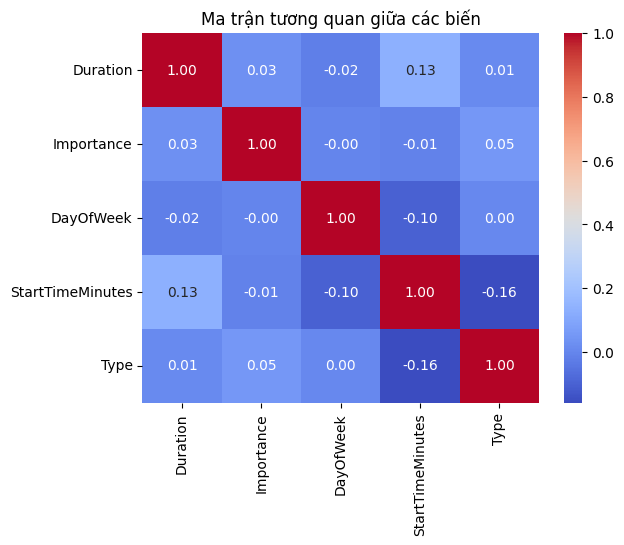

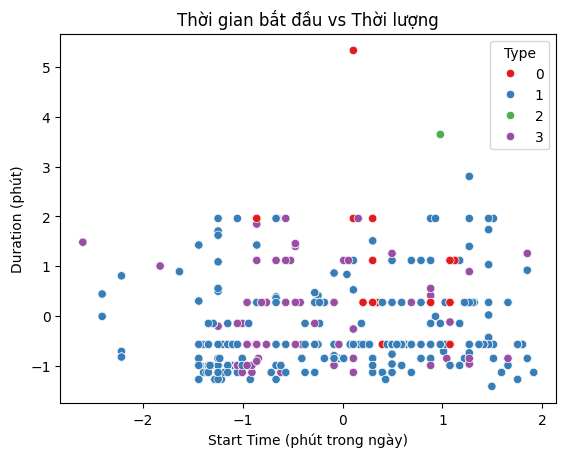

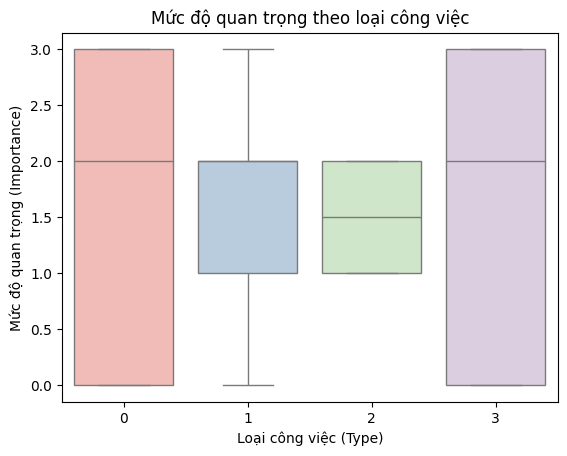

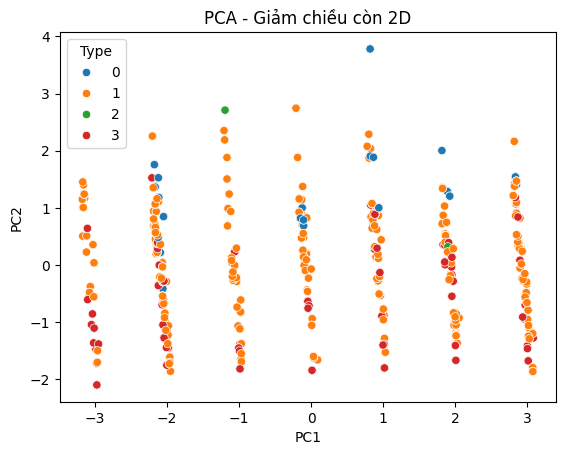

In [6]:
# 1. Heatmap biểu thị tương quan giữa các cột số
plt.figure()
correlation = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# 2. Scatter plot giữa Duration và StartTimeMinutes
plt.figure()
sns.scatterplot(data=used_data, x="StartTimeMinutes", y="Duration", hue="Type", palette="Set1")
plt.title("Thời gian bắt đầu vs Thời lượng")
plt.xlabel("Start Time (phút trong ngày)")
plt.ylabel("Duration (phút)")
plt.show()

# 3. Boxplot: Importance theo Type
plt.figure()
sns.boxplot(data=used_data, x="Type", y="Importance", hue="Type", palette="Pastel1", legend=False)
plt.title("Mức độ quan trọng theo loại công việc")
plt.xlabel("Loại công việc (Type)")
plt.ylabel("Mức độ quan trọng (Importance)")
plt.show()


# Áp dụng PCA lên các cột số (hoặc dữ liệu vector hóa)
numerical_features = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features)

# Biểu đồ scatter plot 2D sau PCA
plt.figure()
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=used_data["Type"], palette="tab10")
plt.title("PCA - Giảm chiều còn 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
# Huấn luyện và lưu mô hình
# TRAIN TYPE PREDICTION MODEL
# train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'], used_data_userid=used_data['UserID'])
train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'])

# TRAIN IMPORTANCE PREDICTION MODEL
# train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                   used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'])
train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
                                  used_data_importance=used_data['Importance'])

# TRAIN DURATION PREDICTION MODEL
# train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                 used_data_day_of_week=used_data['DayOfWeek'],
#                                 used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'], used_data_duration=used_data['Duration'])
# train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                 used_data_day_of_week=used_data['DayOfWeek'],
#                                 used_data_importance=used_data['Importance'], used_data_duration=used_data['Duration'], 
#                                 used_data_features=used_data[[
#         'Importance_x_Duration',
#         'DayOfWeek_sin', 'DayOfWeek_cos',
#         'IsWeekend'
#     ]])
train_duration_prediction_model(
    task_name_vectorized,
    used_data_type=used_data['Type'],
    used_data_day_of_week=used_data['DayOfWeek'],
    used_data_importance=used_data['Importance'],
    used_data_duration=used_data['Duration'],
)

#-------------------------
# def time_to_minutes(start_time):
#     hours, minutes = map(int, start_time.split(":"))
#     return hours * 60 + minutes
#
# used_data['StartTimeMinutes'] = used_data['StartTime'].apply(time_to_minutes)

# required_columns = used_data[['Type', 'Importance', 'DayOfWeek', 'UserID']]
# required_columns = used_data[['Type', 'Importance', 'DayOfWeek', 'StartTime_sin', 'StartTime_cos',]]
# required_columns = used_data[['Type', 'Importance', 'DayOfWeek']]
required_columns = used_data[['Type', 'Importance', 'DayOfWeek_sin', 'DayOfWeek_cos']]

train_start_time_prediction_model_2(task_name_vectorized, required_columns=required_columns,
                                  start_time_minutes=used_data['StartTimeMinutes'])

-----type_prediction_model START TRAINNING.-----
Accuracy: 0.9480286738351255
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.95      0.98      0.96       769
           2       1.00      1.00      1.00        12
           3       0.92      0.84      0.88       246

    accuracy                           0.95      1116
   macro avg       0.97      0.95      0.96      1116
weighted avg       0.95      0.95      0.95      1116

type_prediction_model.pkl have been saved successfully.
-----importance_prediction_model START TRAINNING.-----
Accuracy: 0.9077060931899642
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       160
           1       0.86      0.86      0.86       196
           2       0.94      0.96      0.95       621
           3       0.92      0.70      0.80       139

    accuracy                           0.91      1116
   macro avg       0.